In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as patches
import matplotlib.lines as lines
%matplotlib inline

Fossil fuels

Using the formula in Eq.4 and the plant values from the Excel (Table 2) calculate the EROEI_el for all CFs between 50 and 90. Then create a conversion factor.

In [2]:
CFs=[50,55,60,65,70,75,80,85,90]
EROEI_els=[[8.8,9.2,8.8,10.7,11,26],
[9.2,9.6,9.2,11.2,11.5,27],
[9.6,10.1,9.7,11.6,12,27.8],
[10,10.5,10.1,12,12.4,28.6],
[10.3,10.8,10.5,12.4,12.8,29.3],
[10.7,11.1,10.8,12.7,13.2,29.9],
[11,11.5,11.2,13,13.5,30.5],
[11.2,11.7,11.5,13.3,13.8,31],
[11.5,12,11.8,13.5,14.1,31.5]]

In [3]:
df=pd.DataFrame(EROEI_els).T
df.columns=CFs
df.index.name='Plant #'
df.columns.name='CF'

In [4]:
df

CF,50,55,60,65,70,75,80,85,90
Plant #,,,,,,,,,
0,8.8,9.2,9.6,10.0,10.3,10.7,11.0,11.2,11.5
1,9.2,9.6,10.1,10.5,10.8,11.1,11.5,11.7,12.0
2,8.8,9.2,9.7,10.1,10.5,10.8,11.2,11.5,11.8
3,10.7,11.2,11.6,12.0,12.4,12.7,13.0,13.3,13.5
4,11.0,11.5,12.0,12.4,12.8,13.2,13.5,13.8,14.1
5,26.0,27.0,27.8,28.6,29.3,29.9,30.5,31.0,31.5


Capacity factor conversion ratio

In [5]:
(df[90]/df[50])/(90/50.0)

Plant #
0    0.726010
1    0.724638
2    0.744949
3    0.700935
4    0.712121
5    0.673077
dtype: float64

When we step up from CF 50 to 90, EROEI_el only gets to 70% of what it should be using pure capacity factor conversion (90/50=1.8 multiplier). This is of course still dependent on the source EROEI, but let us use 0.7 for now, judgin on the examined EROEI ranges and the resultant conversion ratio values from the table above.

In [6]:
CF=[50,90]
CF_ratio=[1,0.7]

We need to create a similar ratio for the Capture ratio CR. We use the Energy penalty figure from the Data from GOTO Excel file, sheet title Efficiency v.s capture rate.

|CR | energy penalty  |
|--|--|
|50| 16  |
|90| 28|

In [7]:
CR=[90,50]
CR_ratio=[1, 16.0/28]

In [8]:
CR_ratio

[1, 0.5714285714285714]

C:\Anaconda2\lib\site-packages\numpy\ma\core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Anaconda2\lib\site-packages\numpy\ma\core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


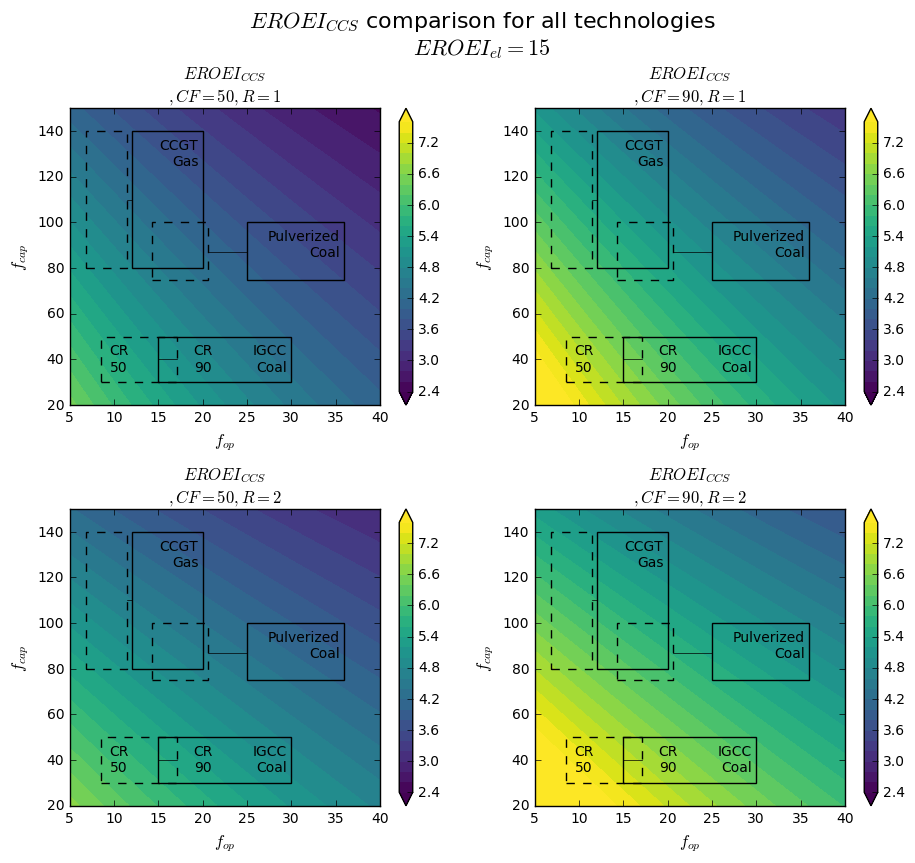

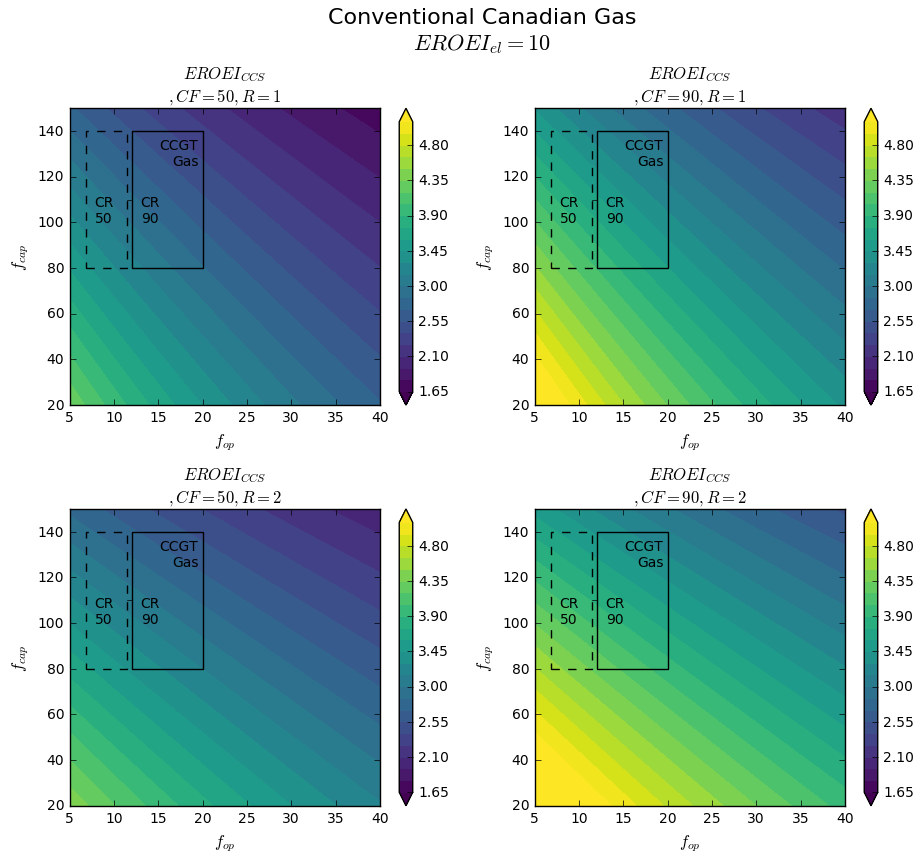

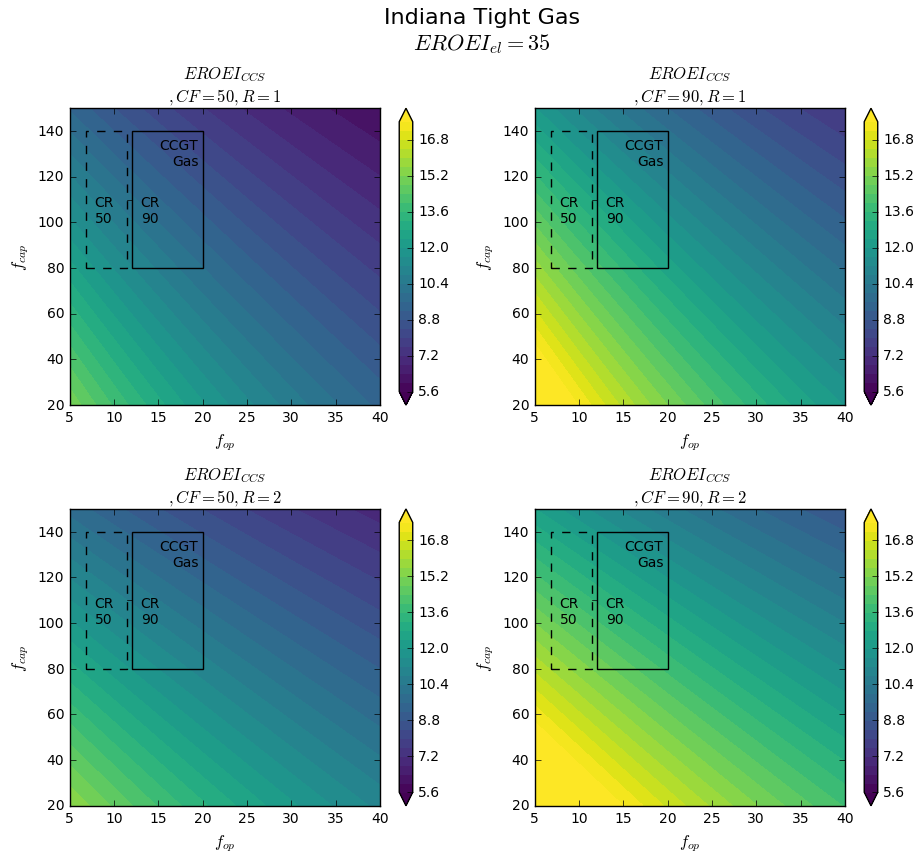

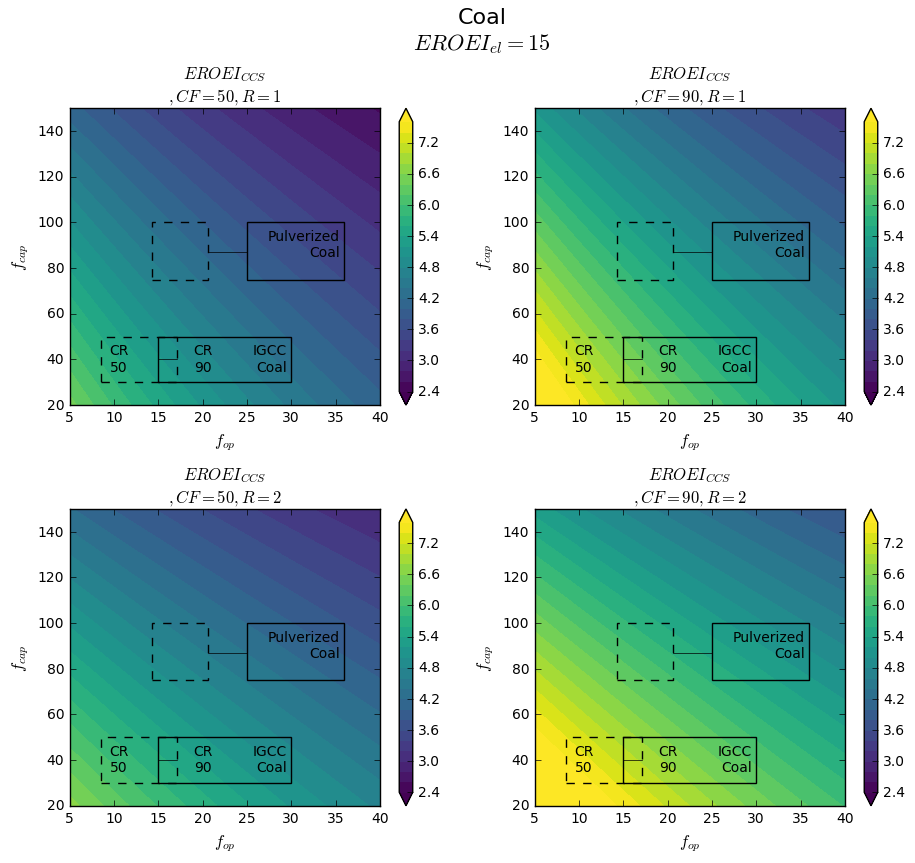

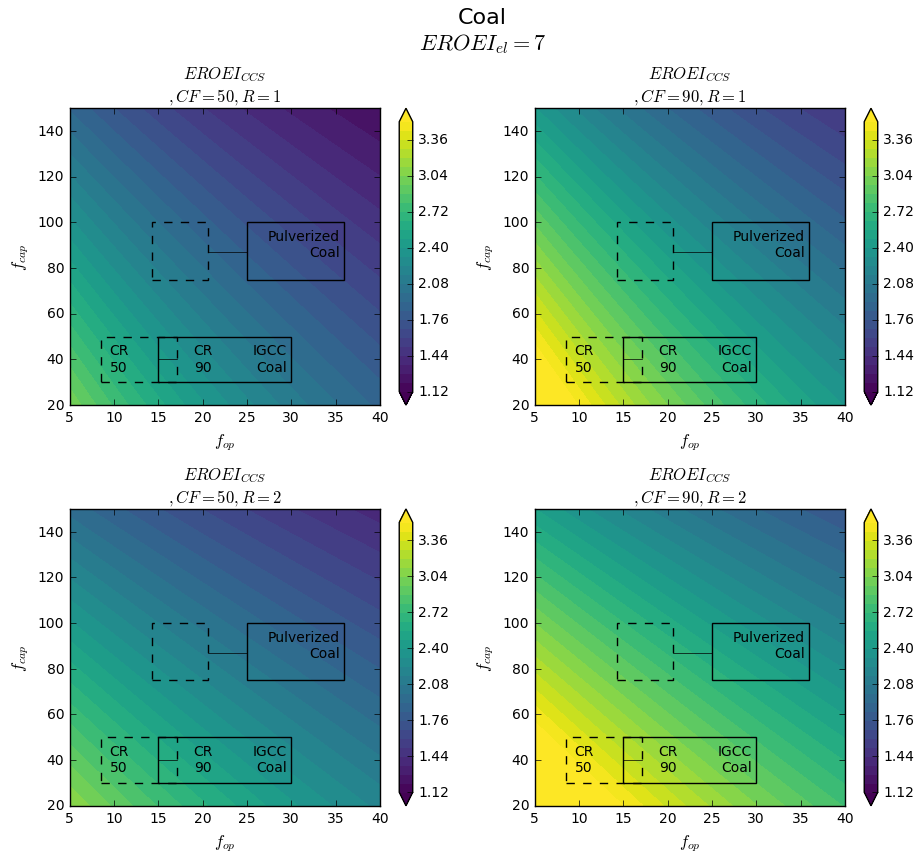

In [9]:
fop=np.linspace(5,40,100)
fcap=np.linspace(20,150,100)
R=[1,2]
titles=[u'$EROEI_{CCS}$ comparison for all technologies','Conventional Canadian Gas','Indiana Tight Gas','Coal','Coal']
eroei_els=[15,10,35,15,7]
names=['CCGT\nGas','Pulverized\nCoal','IGCC\nCoal']
t0s=[[12,20,80,140],[25,36,75,100],[15,30,30,50]]                
minmax=[{'min':0,'max':0} for i in range(4)]
for r in range(len(titles)):
    eroei_el=eroei_els[r]
    eroei_ccs=np.zeros([len(CR),len(CF),len(fop),len(fcap)])
    for i in range(len(R)):
        for j in range(len(CF)):
            for k in range(len(fop)):
                for l in range(len(fcap)):
                    eroei_ccs[i][j][k,l]=(1-fop[k]/100.0)*((R[i]+1)/(R[i]+1+fcap[l]/100.0))*eroei_el*CF[j]*CF_ratio[j]/100.0
                    if ((i==1)and(j==1)):
                        if r==1:
                            n=0
                            p=0
                            if ((abs(fop[k]-t0s[n][0])<0.5)and(abs(fcap[l]-t0s[n][2])<1.5)):
                                minmax[p]['max']=eroei_ccs[i][j][k,l]
                            if ((abs(fop[k]-t0s[n][1])<0.5)and(abs(fcap[l]-t0s[n][3])<1.5)):
                                minmax[p]['min']=eroei_ccs[i][j][k,l]
                        if r==2:
                            n=0
                            p=1
                            if ((abs(fop[k]-t0s[n][0])<0.5)and(abs(fcap[l]-t0s[n][2])<1.5)):
                                minmax[p]['max']=eroei_ccs[i][j][k,l]
                            if ((abs(fop[k]-t0s[n][1])<0.5)and(abs(fcap[l]-t0s[n][3])<1.5)):
                                minmax[p]['min']=eroei_ccs[i][j][k,l]
                        if r==3:
                            n=2
                            p=2
                            if ((abs(fop[k]-t0s[n][0])<0.5)and(abs(fcap[l]-t0s[n][2])<1.5)):
                                minmax[p]['max']=eroei_ccs[i][j][k,l]
                            if ((abs(fop[k]-t0s[n][1])<0.5)and(abs(fcap[l]-t0s[n][3])<1.5)):
                                minmax[p]['min']=eroei_ccs[i][j][k,l]
                        if r==4:
                            n=2
                            p=3
                            if ((abs(fop[k]-t0s[n][0])<0.5)and(abs(fcap[l]-t0s[n][2])<1.5)):
                                minmax[p]['max']=eroei_ccs[i][j][k,l]
                            if ((abs(fop[k]-t0s[n][1])<0.5)and(abs(fcap[l]-t0s[n][3])<1.5)):
                                minmax[p]['min']=eroei_ccs[i][j][k,l]

    fig,axes=plt.subplots(2,2,figsize=(11,9))
    plt.subplots_adjust(hspace=0.35)
    for i in range(len(axes)):
        for j in range(len(axes[i])):
            ax=axes[i][j]
            z = eroei_ccs[i][j]
            levels = MaxNLocator(nbins=30).tick_values(eroei_el/6.0, eroei_el/2.0)
            cmap = plt.get_cmap('viridis')
            X, Y = np.meshgrid(fop, fcap)
            im = ax.contourf(X, Y, z, cmap=cmap, levels=levels,extend='both')
            fig.colorbar(im, ax=ax)
            ax.set_xlim((fop.min(),fop.max()))
            ax.set_ylim((fcap.min(),fcap.max()))
            
            ls=['-','--']
            ls0='-'
            lw0=0.5
            for m in range(len(CR_ratio)):
                n=m*0
                for ti in range(len(t0s)):
                    if ((r==0)or(((r==1)or(r==2))and(ti==0))or(((r==3)or(r==4))and(ti!=0))):
                        t0=t0s[ti]
                        t=[t0[0]*CR_ratio[m],t0[1]*CR_ratio[m],t0[2]+n,t0[3]+n]
                        rect = patches.Rectangle((t[0],t[2]),t[1]-t[0],t[3]-t[2],linewidth=1,edgecolor='k',facecolor='none',ls=ls[m])
                        ax.add_patch(rect)
                        if ti==2:
                            ax.text(t[0]+2+(1-m)*3,t[3]-15,'CR\n'+str(CR[m]),horizontalalignment='center')
                        elif ti==0:
                            if ((r==1)or(r==2)):
                                ax.text(t[0]+2,t[3]-40,'CR\n'+str(CR[m]),horizontalalignment='center')
                        if m==0: 
                            ax.text(t[1]-0.5,t[3]-15,names[ti],horizontalalignment='right')
                        else:
                            line = lines.Line2D((t0[0],t[1]),((t0[2]+t0[3])/2,(t[2]+t[3])/2),color='k',linewidth=lw0,ls=ls0)
                            ax.add_line(line)  

            ax.set_xlabel('$f_{op}$',fontsize=12)
            ax.set_ylabel('$f_{cap}$',fontsize=12)
            ax.set_title(u'$EROEI_{CCS}$\n$, CF='+str(CF[j])+', R='+str(R[i])+'$')
    plt.suptitle(titles[r]+'\n'+r'$EROEI_{el}='+str(eroei_el)+'$',fontsize=16,y=1.01)
    plt.show()

RE

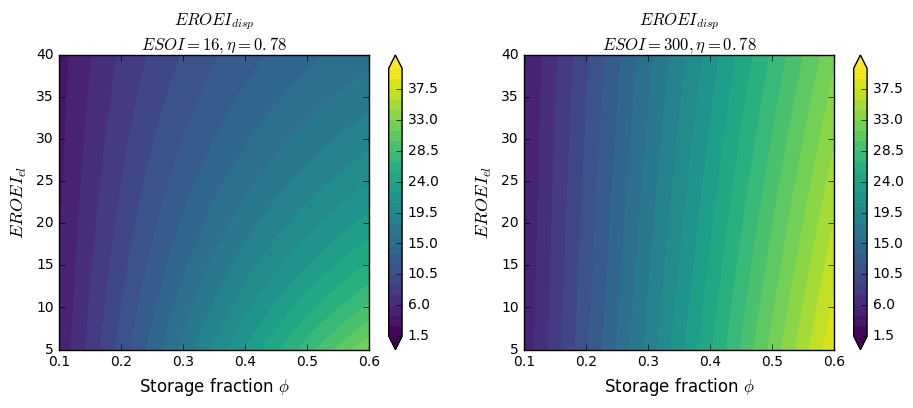

In [10]:
eroei_el=np.linspace(5,40,100)
phi=np.linspace(.10,.60,100)
ESOI=[16,300]
eta=0.78
eroei_disp=np.zeros([len(ESOI),len(phi),len(eroei_el)])
for i in range(len(ESOI)):
    for j in range(len(phi)):
        for k in range(len(eroei_el)):
            eroei_disp[i][j,k]=((1-phi[j])+(eta*phi[j]))/((1/eroei_el[k])+(eta*phi[j]/ESOI[i]))
fig,axes=plt.subplots(1,2,figsize=(11,3.8))
plt.subplots_adjust(hspace=0.35)
#levels = MaxNLocator(nbins=15).tick_values(4000, 15000)
for i in range(len(axes)):
    ax=axes[i]
    z = eroei_disp[i]
    levels = MaxNLocator(nbins=30).tick_values(2, 40)
    cmap = plt.get_cmap('viridis')
    X, Y = np.meshgrid(phi, eroei_el)
    im = ax.contourf(X, Y, z, cmap=cmap, levels=levels,extend='both')

    fig.colorbar(im, ax=ax)
    ax.set_xlim((phi.min(),phi.max()))
    ax.set_ylim((eroei_el.min(),eroei_el.max()))

    ax.set_xlabel('Storage fraction $\phi$',fontsize=12)
    ax.set_ylabel('$EROEI_{el}$',fontsize=13)
    ax.set_title(u'$EROEI_{disp}$\n$ESOI='+str(ESOI[i])+', \eta='+str(eta)+'$')
plt.show()

Overlay

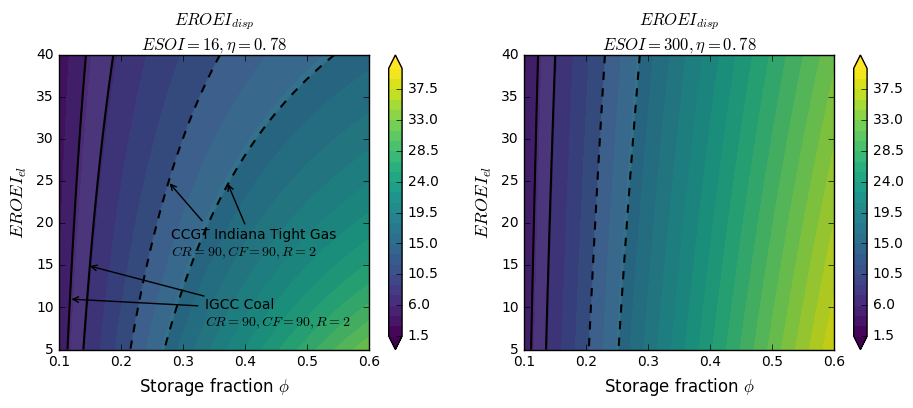

In [11]:
eroei_el=np.linspace(5,40,100)
phi=np.linspace(.10,.60,100)
ESOI=[16,300]
eta=0.78
eroei_disp=np.zeros([len(ESOI),len(phi),len(eroei_el)])
for i in range(len(ESOI)):
    for j in range(len(phi)):
        for k in range(len(eroei_el)):
            eroei_disp[i][j,k]=((1-phi[j])+(eta*phi[j]))/((1/eroei_el[k])+(eta*phi[j]/ESOI[i]))
fig,axes=plt.subplots(1,2,figsize=(11,3.8))
plt.subplots_adjust(hspace=0.35)
#levels = MaxNLocator(nbins=15).tick_values(4000, 15000)
for i in range(len(axes)):
    ax=axes[i]
    z = eroei_disp[i]
    levels = MaxNLocator(nbins=30).tick_values(2, 40)
    cmap = plt.get_cmap('viridis')
    X, Y = np.meshgrid(phi, eroei_el)
    im = ax.contourf(X, Y, z, cmap=cmap, levels=levels,extend='both')
    fig.colorbar(im, ax=ax)
    
    r=2
    im = ax.contour(X, Y, z, levels=np.linspace(minmax[r]['min'],minmax[r]['max'],2),extend='both',colors='k',linewidths=1.5)
    im = ax.contourf(X, Y, z, colors=[[0,0,0,1],[1,1,1,1],[0,0,0,1]], levels=np.linspace(minmax[r]['min'],minmax[r]['max'],2),extend='both',alpha=0.05,)
    r=1
    im = ax.contour(X, Y, z, levels=np.linspace(minmax[r]['min'],minmax[r]['max'],2),extend='both',colors='k',linewidths=1.5,linestyles='--')
    im = ax.contourf(X, Y, z, colors=[[0,0,0,1],[1,1,1,1],[0,0,0,1]], levels=np.linspace(minmax[r]['min'],minmax[r]['max'],2),extend='both',alpha=0.05,)
    
    ax.set_xlim((phi.min(),phi.max()))
    ax.set_ylim((eroei_el.min(),eroei_el.max()))

    ax.set_xlabel('Storage fraction $\phi$',fontsize=12)
    ax.set_ylabel('$EROEI_{el}$',fontsize=13)
    ax.set_title(u'$EROEI_{disp}$\n$ESOI='+str(ESOI[i])+', \eta='+str(eta)+'$')

axes[0].annotate('CCGT Indiana Tight Gas\n$CR=90,CF=90,R=2$', 
         xy=(0.37, 25),  
         xycoords='data',
         xytext=(-40, -55),
         textcoords='offset points',
         arrowprops=dict(arrowstyle="->"))
axes[0].annotate('', 
         xy=(0.275, 25),  
         xycoords='data',
         xytext=(26, -30),
         textcoords='offset points',
         arrowprops=dict(arrowstyle="->"))
axes[0].annotate('IGCC Coal\n$CR=90,CF=90,R=2$', 
         xy=(0.145, 15),  
         xycoords='data',
         xytext=(85, -45),
         textcoords='offset points',
         arrowprops=dict(arrowstyle="->"))
axes[0].annotate(' ', 
         xy=(0.115, 11),  
         xycoords='data',
         xytext=(95, -5),
         textcoords='offset points',
         arrowprops=dict(arrowstyle="->"))

plt.show()

In [47]:
eroei_els

[15, 10, 35, 15, 7]

In [13]:
minmax

[{'max': 4.3511152416356875, 'min': 3.421402383134739},
 {'max': 15.228903345724907, 'min': 11.974908340971588},
 {'max': 7.269452933985329, 'min': 5.629932218055956},
 {'max': 3.3924113691931534, 'min': 2.627301701759446}]

0.1 7.828282828282829
0.1 16.666666666666664
0.1 17.02020202020202
0.10505050505050506 7.828282828282829
0.10505050505050506 17.02020202020202
0.1101010101010101 7.828282828282829
0.1101010101010101 17.02020202020202
0.11515151515151516 7.828282828282829
0.11515151515151516 17.02020202020202
0.11515151515151516 17.373737373737374
0.12020202020202021 7.828282828282829
0.12020202020202021 17.02020202020202
0.12020202020202021 17.373737373737374
0.12525252525252525 7.828282828282829
0.12525252525252525 17.373737373737374
0.1303030303030303 7.828282828282829
0.1303030303030303 17.373737373737374
0.13535353535353536 7.828282828282829
0.13535353535353536 17.373737373737374
0.13535353535353536 17.727272727272727
0.14040404040404042 7.828282828282829
0.14040404040404042 17.373737373737374
0.14040404040404042 17.727272727272727
0.14545454545454545 7.828282828282829
0.14545454545454545 17.727272727272727
0.15050505050505053 7.828282828282829
0.15050505050505053 8.181818181818182
0.15050505050505

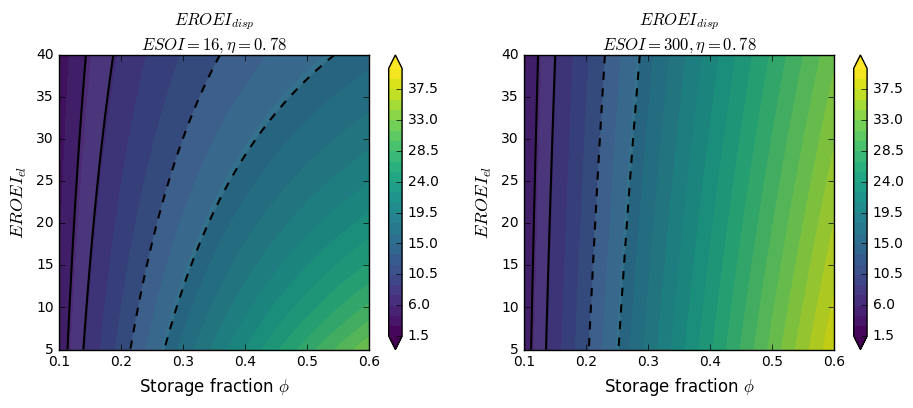

In [45]:
eroei_el=np.linspace(5,40,100)
phi=np.linspace(.10,.60,100)
ESOI=[16,300]
eta=0.78
eroei_disp=np.zeros([len(ESOI),len(phi),len(eroei_el)])
minmaxr=[{'min':0,'max':0} for i in range(4)]
b=[]
for i in range(len(ESOI)):
    for j in range(len(phi)):
        for k in range(len(eroei_el)):
            eroei_disp[i][j,k]=((1-phi[j])+(eta*phi[j]))/((1/eroei_el[k])+(eta*phi[j]/ESOI[i]))
            if (i==0):
                for r in range(4):
                    if abs(eroei_disp[i][j,k]-minmax[r]['max'])<0.2:
                        print phi[j],eroei_el[k]
                        if abs(eroei_el[k]-eroei_els[r+1])<0.2:
                            b.append([phi[j],eroei_el[k]])
                        
                    #
                        #print i,j,k,r,eroei_el[k],eroei_els[r+1]
                        #print eroei_disp[i][j,k],minmax[r]['min'],minmax[r]['max']
                        #if abs(eroei_disp[i][j,k]-minmax[r]['min'])<0.5:
                        #    b.append([phi[j],eroei_el[k],eroei_disp[i][j,k],eroei_disp[i][j,k]-minmax[r]['min']])
                        #    if eroei_el[k]<eroei_els[r+1]:
                        #        minmaxr[r]['min']=phi[j]
                            #print phi[j],j
                        #    if eroei_el[k]<eroei_els[r+1]:
                        #        minmaxr[r]['max']=phi[j]
                          #  print phi[j],j,minmax[r]['max']
                        
                            
fig,axes=plt.subplots(1,2,figsize=(11,3.8))
plt.subplots_adjust(hspace=0.35)
for i in range(len(axes)):
    ax=axes[i]
    z = eroei_disp[i]
    levels = MaxNLocator(nbins=30).tick_values(2, 40)
    cmap = plt.get_cmap('viridis')
    X, Y = np.meshgrid(phi, eroei_el)
    im = ax.contourf(X, Y, z, cmap=cmap, levels=levels,extend='both')
    fig.colorbar(im, ax=ax)
    
    r=2
    im = ax.contour(X, Y, z, levels=np.linspace(minmax[r]['min'],minmax[r]['max'],2),extend='both',colors='k',linewidths=1.5)
    im = ax.contourf(X, Y, z, colors=[[0,0,0,1],[1,1,1,1],[0,0,0,1]], levels=np.linspace(minmax[r]['min'],minmax[r]['max'],2),extend='both',alpha=0.05,)
    r=1
    im = ax.contour(X, Y, z, levels=np.linspace(minmax[r]['min'],minmax[r]['max'],2),extend='both',colors='k',linewidths=1.5,linestyles='--')
    im = ax.contourf(X, Y, z, colors=[[0,0,0,1],[1,1,1,1],[0,0,0,1]], levels=np.linspace(minmax[r]['min'],minmax[r]['max'],2),extend='both',alpha=0.05,)
    
    ax.set_xlim((phi.min(),phi.max()))
    ax.set_ylim((eroei_el.min(),eroei_el.max()))

    ax.set_xlabel('Storage fraction $\phi$',fontsize=12)
    ax.set_ylabel('$EROEI_{el}$',fontsize=13)
    ax.set_title(u'$EROEI_{disp}$\n$ESOI='+str(ESOI[i])+', \eta='+str(eta)+'$')
    
plt.show()

In [46]:
b

[[0.5797979797979799, 35.05050505050505],
 [0.5848484848484848, 35.05050505050505],
 [0.5898989898989899, 35.05050505050505],
 [0.594949494949495, 35.05050505050505]]